In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('NewSl.csv')
dataset.head()

,Date,Month,Year,RF,T max,T min,Avg_tem
0,1,10,2013,0.0,31.1,25.8,28.45
1,2,10,2013,0.0,31.3,27.5,29.40
2,3,10,2013,1.6,31.3,27.3,29.30
3,4,10,2013,5.8,30.7,25.7,28.20
4,5,10,2013,0.3,30.8,24.4,27.60


In [4]:
dataset_mod1 = dataset[['Avg_tem']]
dataset_mod1.head()

,Avg_tem
0,28.45
1,29.40
2,29.30
3,28.20
4,27.60


In [5]:
training_set = dataset_mod1.iloc[0:365,0]

training_set

0      28.45
1      29.40
2      29.30
3      28.20
4      27.60
       ...  
360    27.40
361    27.50
362    27.90
363    28.05
364    27.35
Name: Avg_tem, Length: 365, dtype: float64

In [6]:
#Feature Scaling 
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))

In [7]:
training_set = training_set.values.reshape(len(training_set), 1)
training_set

array([[28.45],
       [29.4 ],
       [29.3 ],
       [28.2 ],
       [27.6 ],
       [28.05],
       [27.75],
       [27.65],
       [29.1 ],
       [28.05],
       [28.4 ],
       [27.95],
       [28.25],
       [28.1 ],
       [28.25],
       [28.85],
       [27.7 ],
       [27.25],
       [25.7 ],
       [26.7 ],
       [28.35],
       [27.7 ],
       [28.9 ],
       [28.2 ],
       [27.75],
       [27.55],
       [27.75],
       [28.3 ],
       [27.75],
       [27.55],
       [27.3 ],
       [27.3 ],
       [27.3 ],
       [27.  ],
       [27.8 ],
       [27.7 ],
       [27.8 ],
       [27.55],
       [27.45],
       [28.1 ],
       [27.15],
       [28.25],
       [28.35],
       [27.  ],
       [28.15],
       [27.85],
       [27.5 ],
       [28.35],
       [27.9 ],
       [27.4 ],
       [27.25],
       [27.4 ],
       [28.05],
       [27.65],
       [26.75],
       [27.4 ],
       [27.45],
       [27.35],
       [27.  ],
       [27.75],
       [28.5 ],
       [26.75],
       [

In [8]:
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.58181818],
       [0.75454545],
       [0.73636364],
       [0.53636364],
       [0.42727273],
       [0.50909091],
       [0.45454545],
       [0.43636364],
       [0.7       ],
       [0.50909091],
       [0.57272727],
       [0.49090909],
       [0.54545455],
       [0.51818182],
       [0.54545455],
       [0.65454545],
       [0.44545455],
       [0.36363636],
       [0.08181818],
       [0.26363636],
       [0.56363636],
       [0.44545455],
       [0.66363636],
       [0.53636364],
       [0.45454545],
       [0.41818182],
       [0.45454545],
       [0.55454545],
       [0.45454545],
       [0.41818182],
       [0.37272727],
       [0.37272727],
       [0.37272727],
       [0.31818182],
       [0.46363636],
       [0.44545455],
       [0.46363636],
       [0.41818182],
       [0.4       ],
       [0.51818182],
       [0.34545455],
       [0.54545455],
       [0.56363636],
       [0.31818182],
       [0.52727273],
       [0.47272727],
       [0.40909091],
       [0.563

In [9]:
x_train = []
y_train = []
n_future = 4 # next 4 days temperature forecast
n_past = 30 # Past 30 days 
for i in range(0,len(training_set_scaled)-n_past-n_future+1):
    x_train.append(training_set_scaled[i : i + n_past , 0])     
    y_train.append(training_set_scaled[i + n_past : i + n_past + n_future , 0 ])
x_train , y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0] , x_train.shape[1], 1) )

In [10]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from keras.datasets import imdb

In [11]:
from keras.layers import LSTM,Dense ,Dropout
# Fitting RNN to training set using Keras Callbacks. Read Keras callbacks docs for more info.

In [12]:
regressor = Sequential()
regressor.add(Bidirectional(LSTM(units=30, return_sequences=True), input_shape = (x_train.shape[1],1) ) )
regressor.add(Dropout(0.2))
regressor.add(LSTM(units= 30 , return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units= 30 , return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units= 30))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = n_future,activation='linear'))
regressor.compile(optimizer='adam', loss='mean_squared_error',metrics=['acc'])
history = regressor.fit(x_train, y_train, epochs=500,batch_size=32,validation_split=0.20 )

print(history.history['loss'])
print(history.history['acc'])
print(history.history['val_loss'])
print(history.history['val_acc'])



Epoch 1/500


9/9 [==============================] - 8s 196ms/step - loss: 0.2198 - acc: 0.2264 - val_loss: 0.0342 - val_acc: 0.2388
Epoch 2/500
9/9 [==============================] - 0s 21ms/step - loss: 0.0640 - acc: 0.2340 - val_loss: 0.0368 - val_acc: 0.2985
Epoch 3/500
9/9 [==============================] - 0s 23ms/step - loss: 0.0496 - acc: 0.2981 - val_loss: 0.0268 - val_acc: 0.2388
Epoch 4/500
9/9 [==============================] - 0s 24ms/step - loss: 0.0440 - acc: 0.2340 - val_loss: 0.0231 - val_acc: 0.2388
Epoch 5/500
9/9 [==============================] - 0s 25ms/step - loss: 0.0432 - acc: 0.2302 - val_loss: 0.0237 - val_acc: 0.2985
Epoch 6/500
9/9 [==============================] - 0s 24ms/step - loss: 0.0386 - acc: 0.2717 - val_loss: 0.0246 - val_acc: 0.2388
Epoch 7/500
9/9 [==============================] - 0s 23ms/step - loss: 0.0376 - acc: 0.3132 - val_loss: 0.0237 - val_acc: 0.2388
Epoch 8/500
9/9 [==============================] - 0s 22ms/step - loss: 0.0354 - acc:

9/9 [==============================] - 0s 22ms/step - loss: 0.0268 - acc: 0.2717 - val_loss: 0.0251 - val_acc: 0.2687
Epoch 58/500
9/9 [==============================] - 0s 23ms/step - loss: 0.0306 - acc: 0.2830 - val_loss: 0.0356 - val_acc: 0.3433
Epoch 59/500
9/9 [==============================] - 0s 23ms/step - loss: 0.0281 - acc: 0.2264 - val_loss: 0.0245 - val_acc: 0.2687
Epoch 60/500
9/9 [==============================] - 0s 23ms/step - loss: 0.0286 - acc: 0.2113 - val_loss: 0.0260 - val_acc: 0.2388
Epoch 61/500
9/9 [==============================] - 0s 24ms/step - loss: 0.0266 - acc: 0.2415 - val_loss: 0.0303 - val_acc: 0.2239
Epoch 62/500
9/9 [==============================] - 0s 25ms/step - loss: 0.0274 - acc: 0.2491 - val_loss: 0.0246 - val_acc: 0.1791
Epoch 63/500
9/9 [==============================] - 0s 25ms/step - loss: 0.0293 - acc: 0.3057 - val_loss: 0.0350 - val_acc: 0.3284
Epoch 64/500
9/9 [==============================] - 0s 25ms/step - loss: 0.0306 - acc: 0.2642 - 

9/9 [==============================] - 0s 23ms/step - loss: 0.0209 - acc: 0.2453 - val_loss: 0.0327 - val_acc: 0.2537
Epoch 120/500
9/9 [==============================] - 0s 23ms/step - loss: 0.0215 - acc: 0.2528 - val_loss: 0.0376 - val_acc: 0.3284
Epoch 121/500
9/9 [==============================] - 0s 25ms/step - loss: 0.0217 - acc: 0.3057 - val_loss: 0.0370 - val_acc: 0.2985
Epoch 122/500
9/9 [==============================] - 0s 26ms/step - loss: 0.0212 - acc: 0.2755 - val_loss: 0.0370 - val_acc: 0.2836
Epoch 123/500
9/9 [==============================] - 0s 26ms/step - loss: 0.0205 - acc: 0.2642 - val_loss: 0.0305 - val_acc: 0.2687
Epoch 124/500
9/9 [==============================] - 0s 25ms/step - loss: 0.0204 - acc: 0.2868 - val_loss: 0.0348 - val_acc: 0.2687
Epoch 125/500
9/9 [==============================] - 0s 25ms/step - loss: 0.0210 - acc: 0.2302 - val_loss: 0.0370 - val_acc: 0.2836
Epoch 126/500
9/9 [==============================] - 0s 23ms/step - loss: 0.0205 - acc: 0.

9/9 [==============================] - 0s 24ms/step - loss: 0.0174 - acc: 0.2868 - val_loss: 0.0372 - val_acc: 0.3433
Epoch 182/500
9/9 [==============================] - 0s 24ms/step - loss: 0.0171 - acc: 0.3170 - val_loss: 0.0406 - val_acc: 0.3134
Epoch 183/500
9/9 [==============================] - 0s 26ms/step - loss: 0.0173 - acc: 0.2453 - val_loss: 0.0415 - val_acc: 0.3284
Epoch 184/500
9/9 [==============================] - 0s 24ms/step - loss: 0.0184 - acc: 0.3132 - val_loss: 0.0428 - val_acc: 0.2687
Epoch 185/500
9/9 [==============================] - 0s 24ms/step - loss: 0.0179 - acc: 0.3019 - val_loss: 0.0334 - val_acc: 0.3134
Epoch 186/500
9/9 [==============================] - 0s 24ms/step - loss: 0.0177 - acc: 0.3132 - val_loss: 0.0413 - val_acc: 0.2985
Epoch 187/500
9/9 [==============================] - 0s 21ms/step - loss: 0.0177 - acc: 0.2792 - val_loss: 0.0410 - val_acc: 0.2836
Epoch 188/500
9/9 [==============================] - 0s 22ms/step - loss: 0.0181 - acc: 0.

9/9 [==============================] - 0s 23ms/step - loss: 0.0141 - acc: 0.3094 - val_loss: 0.0432 - val_acc: 0.2537
Epoch 244/500
9/9 [==============================] - 0s 24ms/step - loss: 0.0143 - acc: 0.3094 - val_loss: 0.0442 - val_acc: 0.2836
Epoch 245/500
9/9 [==============================] - 0s 25ms/step - loss: 0.0140 - acc: 0.3132 - val_loss: 0.0441 - val_acc: 0.2985
Epoch 246/500
9/9 [==============================] - 0s 23ms/step - loss: 0.0142 - acc: 0.2679 - val_loss: 0.0425 - val_acc: 0.2985
Epoch 247/500
9/9 [==============================] - 0s 23ms/step - loss: 0.0138 - acc: 0.3208 - val_loss: 0.0451 - val_acc: 0.3284
Epoch 248/500
9/9 [==============================] - 0s 23ms/step - loss: 0.0143 - acc: 0.3321 - val_loss: 0.0413 - val_acc: 0.3134
Epoch 249/500
9/9 [==============================] - 0s 23ms/step - loss: 0.0166 - acc: 0.2906 - val_loss: 0.0396 - val_acc: 0.3134
Epoch 250/500
9/9 [==============================] - 0s 26ms/step - loss: 0.0162 - acc: 0.

9/9 [==============================] - 0s 24ms/step - loss: 0.0126 - acc: 0.3283 - val_loss: 0.0542 - val_acc: 0.2836
Epoch 306/500
9/9 [==============================] - 0s 23ms/step - loss: 0.0133 - acc: 0.3547 - val_loss: 0.0390 - val_acc: 0.3134
Epoch 307/500
9/9 [==============================] - 0s 23ms/step - loss: 0.0128 - acc: 0.3094 - val_loss: 0.0435 - val_acc: 0.2985
Epoch 308/500
9/9 [==============================] - 0s 24ms/step - loss: 0.0129 - acc: 0.2868 - val_loss: 0.0495 - val_acc: 0.2985
Epoch 309/500
9/9 [==============================] - 0s 23ms/step - loss: 0.0127 - acc: 0.3019 - val_loss: 0.0512 - val_acc: 0.2537
Epoch 310/500
9/9 [==============================] - 0s 23ms/step - loss: 0.0124 - acc: 0.2679 - val_loss: 0.0502 - val_acc: 0.2537
Epoch 311/500
9/9 [==============================] - 0s 24ms/step - loss: 0.0119 - acc: 0.3358 - val_loss: 0.0533 - val_acc: 0.2687
Epoch 312/500
9/9 [==============================] - 0s 24ms/step - loss: 0.0125 - acc: 0.

9/9 [==============================] - 0s 25ms/step - loss: 0.0127 - acc: 0.3396 - val_loss: 0.0533 - val_acc: 0.3134
Epoch 368/500
9/9 [==============================] - 0s 23ms/step - loss: 0.0108 - acc: 0.3396 - val_loss: 0.0577 - val_acc: 0.2836
Epoch 369/500
9/9 [==============================] - 0s 24ms/step - loss: 0.0112 - acc: 0.3585 - val_loss: 0.0589 - val_acc: 0.2687
Epoch 370/500
9/9 [==============================] - 0s 25ms/step - loss: 0.0112 - acc: 0.3321 - val_loss: 0.0527 - val_acc: 0.3433
Epoch 371/500
9/9 [==============================] - 0s 26ms/step - loss: 0.0113 - acc: 0.3170 - val_loss: 0.0606 - val_acc: 0.2836
Epoch 372/500
9/9 [==============================] - 0s 26ms/step - loss: 0.0109 - acc: 0.3434 - val_loss: 0.0666 - val_acc: 0.3134
Epoch 373/500
9/9 [==============================] - 0s 25ms/step - loss: 0.0106 - acc: 0.3321 - val_loss: 0.0562 - val_acc: 0.3284
Epoch 374/500
9/9 [==============================] - 0s 26ms/step - loss: 0.0106 - acc: 0.

9/9 [==============================] - 0s 23ms/step - loss: 0.0096 - acc: 0.3887 - val_loss: 0.0675 - val_acc: 0.3134
Epoch 430/500
9/9 [==============================] - 0s 23ms/step - loss: 0.0095 - acc: 0.3396 - val_loss: 0.0559 - val_acc: 0.3433
Epoch 431/500
9/9 [==============================] - 0s 23ms/step - loss: 0.0096 - acc: 0.3434 - val_loss: 0.0690 - val_acc: 0.3433
Epoch 432/500
9/9 [==============================] - 0s 23ms/step - loss: 0.0108 - acc: 0.3509 - val_loss: 0.0612 - val_acc: 0.2985
Epoch 433/500
9/9 [==============================] - 0s 22ms/step - loss: 0.0105 - acc: 0.3396 - val_loss: 0.0721 - val_acc: 0.3433
Epoch 434/500
9/9 [==============================] - 0s 22ms/step - loss: 0.0106 - acc: 0.3623 - val_loss: 0.0556 - val_acc: 0.3284
Epoch 435/500
9/9 [==============================] - 0s 23ms/step - loss: 0.0101 - acc: 0.3698 - val_loss: 0.0664 - val_acc: 0.3284
Epoch 436/500
9/9 [==============================] - 0s 23ms/step - loss: 0.0092 - acc: 0.

9/9 [==============================] - 0s 23ms/step - loss: 0.0088 - acc: 0.3774 - val_loss: 0.0577 - val_acc: 0.2985
Epoch 492/500
9/9 [==============================] - 0s 24ms/step - loss: 0.0116 - acc: 0.3660 - val_loss: 0.0599 - val_acc: 0.2985
Epoch 493/500
9/9 [==============================] - 0s 24ms/step - loss: 0.0097 - acc: 0.3585 - val_loss: 0.0608 - val_acc: 0.3284
Epoch 494/500
9/9 [==============================] - 0s 23ms/step - loss: 0.0095 - acc: 0.4075 - val_loss: 0.0630 - val_acc: 0.2985
Epoch 495/500
9/9 [==============================] - 0s 24ms/step - loss: 0.0086 - acc: 0.3925 - val_loss: 0.0657 - val_acc: 0.3134
Epoch 496/500
9/9 [==============================] - 0s 24ms/step - loss: 0.0092 - acc: 0.3472 - val_loss: 0.0599 - val_acc: 0.2985
Epoch 497/500
9/9 [==============================] - 0s 24ms/step - loss: 0.0084 - acc: 0.3925 - val_loss: 0.0661 - val_acc: 0.3134
Epoch 498/500
9/9 [==============================] - 0s 24ms/step - loss: 0.0090 - acc: 0.

In [14]:
# read test dataset
testdataset = pd.read_csv('NewSl.csv')
#get only the temperature column
testdataset = testdataset.iloc[0:30,6:7]
testdataset

,Avg_tem
0,28.45
1,29.40
2,29.30
3,28.20
4,27.60
5,28.05
6,27.75
7,27.65
8,29.10
9,28.05


In [15]:
real_temperature = pd.read_csv('NewSl.csv')
real_temperature = real_temperature.iloc[30:34,6:7]

real_temperature = real_temperature.values.reshape(len(real_temperature), 1)
testing = sc.transform(testdataset)
testing = np.array(testing)
testing = np.reshape(testing,(testing.shape[1],testing.shape[0],1))

C:\Users\Sevindu\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [16]:
real_temperature

array([[27.3],
       [27.3],
       [27.3],
       [27. ]])

In [17]:
predicted_temperature = regressor.predict(testing)
predicted_temperature = sc.inverse_transform(predicted_temperature)
predicted_temperature = np.reshape(predicted_temperature,(predicted_temperature.shape[1],predicted_temperature.shape[0]))

1/1 [==============================] - 1s 1s/step


In [18]:
predicted_temperature

array([[27.26344 ],
       [27.074522],
       [27.027542],
       [27.114056]], dtype=float32)

In [19]:
from matplotlib import pyplot

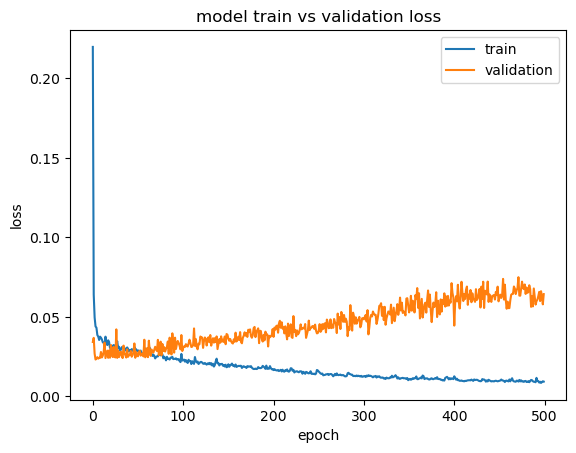

In [20]:
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [21]:
RT = real_temperature
PT = predicted_temperature

In [22]:
model_MSE= (    (   ((PT[0]-RT[0])**2) + ((PT[1]-RT[1])**2) + ((PT[2]-RT[2])**2) + ((PT[3]-RT[3])**2)    )/4 ) 

model_MSE

array([0.03485475])